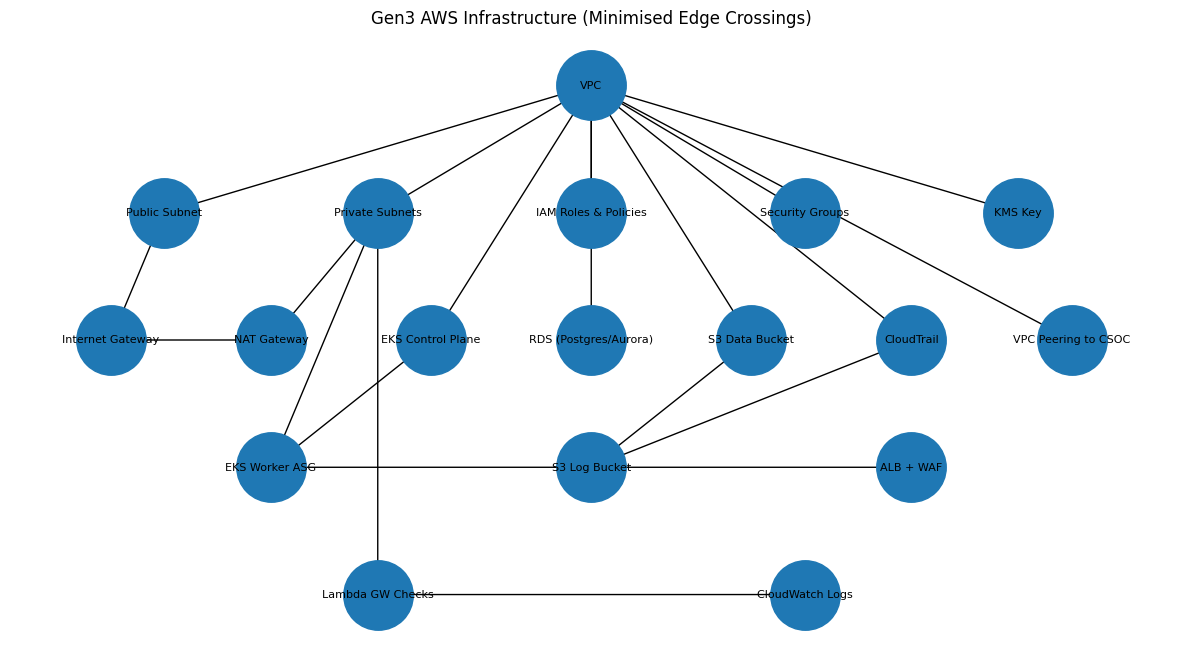

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Build the same high‑level dependency graph
G = nx.DiGraph()

edges = [
    # Core networking
    ("VPC", "Public Subnet"),
    ("VPC", "Private Subnets"),
    ("Public Subnet", "Internet Gateway"),
    ("Private Subnets", "NAT Gateway"),
    ("NAT Gateway", "Internet Gateway"),

    # EKS
    ("Private Subnets", "EKS Worker ASG"),
    ("VPC", "EKS Control Plane"),
    ("EKS Control Plane", "EKS Worker ASG"),

    # Storage & Data
    ("VPC", "RDS (Postgres/Aurora)"),
    ("VPC", "S3 Data Bucket"),
    ("S3 Data Bucket", "S3 Log Bucket"),

    # Observability / Security
    ("VPC", "CloudTrail"),
    ("CloudTrail", "S3 Log Bucket"),
    ("Lambda GW Checks", "CloudWatch Logs"),
    ("Private Subnets", "Lambda GW Checks"),
    ("VPC", "KMS Key"),

    # Edge connectivity
    ("VPC", "VPC Peering to CSOC"),

    # WAF / Load balancer
    ("EKS Worker ASG", "ALB + WAF"),

    # IAM / SG
    ("VPC", "IAM Roles & Policies"),
    ("VPC", "Security Groups"),
]

G.add_edges_from(edges)

# 2. Manually position nodes by logical layers to minimise crossings
layers = [
    ["VPC"],
    ["Public Subnet", "Private Subnets", "IAM Roles & Policies", "Security Groups", "KMS Key"],
    ["Internet Gateway", "NAT Gateway", "EKS Control Plane", "RDS (Postgres/Aurora)", "S3 Data Bucket", "CloudTrail", "VPC Peering to CSOC"],
    ["EKS Worker ASG", "S3 Log Bucket", "ALB + WAF"],
    ["Lambda GW Checks", "CloudWatch Logs"],
]

pos = {}
y_gap = -1.6  # vertical gap between layers
for i, layer in enumerate(layers):
    x_gap = 3.2 / (len(layer) + 1)
    for j, node in enumerate(layer):
        pos[node] = ((j + 1) * x_gap, i * y_gap)

# 3. Draw
plt.figure(figsize=(15, 8))
nx.draw_networkx_nodes(G, pos, node_size=2500)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='->')
plt.title("Gen3 AWS Infrastructure (Minimised Edge Crossings)", fontsize=12)
plt.axis("off")
plt.show()
